# Import necessary libraries

import pandas as pd 
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #Ajusts the configuration of the plots we will create

# Reading in the data
df = pd.read_csv(r'F:\Movie Analysis\movies.csv')

# Data Exploration


In [24]:
# scanning over the data to get an idea

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_corrected
5445,386,5,0,2009,527,7.8,1100000.0,785,1263,1534,47,237000000,2847246203,1382,162.0,69
7445,388,5,0,2019,137,8.4,903000.0,105,513,1470,47,356000000,2797501328,983,181.0,79
3045,4909,5,6,1997,534,7.8,1100000.0,785,1263,1073,47,200000000,2201647264,1382,194.0,56
6663,3643,5,0,2015,529,7.8,876000.0,768,1806,356,47,245000000,2069521700,945,138.0,75
7244,389,5,0,2018,145,8.4,897000.0,105,513,1470,47,321000000,2048359754,983,149.0,78


# Data Cleaning

In [ ]:
# Looking for some missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

In [6]:
#  Data types for each column

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [7]:
# Since there are multiple columns with missing values, its best to drop them rather than modifying them
# because we do not have clear knowledge on those values and you can't just fill them up with aggregate functions

df = df.dropna()

In [8]:
# Changing datatype of columns Budget and gross revenue from float to integer 

df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')

In [9]:
# There seems to be a mismatch between release data and the year the movie released and hence,
# making a new column with the corrected year

df['year_corrected'] = df['released'].astype(str).str[-20:-15]

In [10]:
# sorting the entire dataset on gross revenue from highest to lowest

df.sort_values(by=['gross'], inplace = True, ascending=False)

In [11]:
# Drop any duplicates if exists, showing unique values of companies in the movie industry
# This is to check if unique values are created for two values of the same company, but were created due to some spelling mistakes

#df['company'].drop_duplicates().sort_values(ascending = False)

In [12]:
# Our Hypothesis is that budget and company are highly correlated to the gross revenue but we need to check that

# Finding Correlations

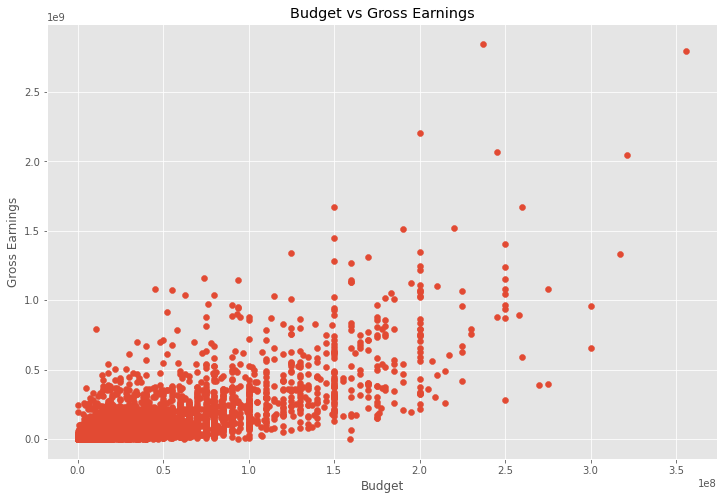

In [13]:
# Scatter plot - Budget Vs Gross Revnue

plt.scatter(x = df['budget'], y = df['gross'])

plt.title('Budget vs Gross Earnings')

plt.xlabel('Budget')

plt.ylabel('Gross Earnings')

plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

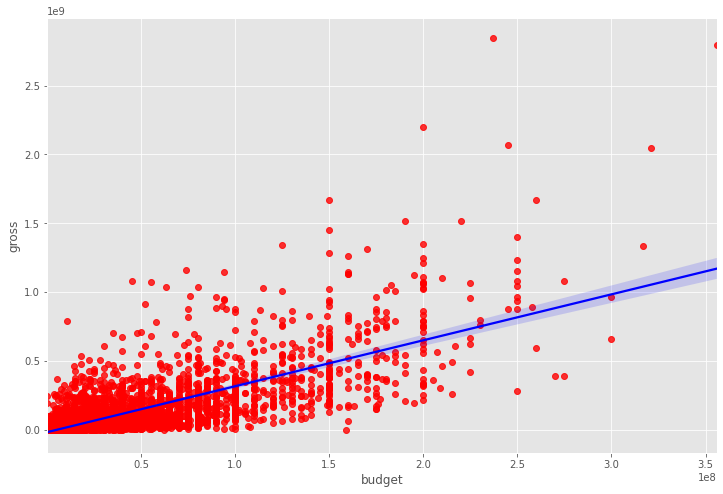

In [14]:
# To get the regression line for the above plot

sns.regplot(x = 'budget', y = 'gross', data = df, scatter_kws = {"color" : "red"}, line_kws = {"color" : "blue"})

In [15]:
#Visually, it seems like Budget and Gross are positively correlated, however, we get a better piture
#when we look at the actual value

df.corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


In [16]:
# There seems to be a high correlation between budget and gross and that proves we are right about that hypothesis

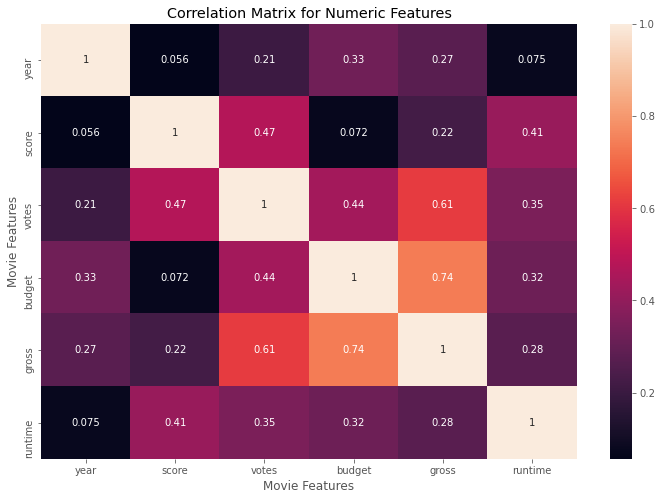

In [17]:
# Plotting a Heatmap for better and comprehensible visualization

correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [18]:
# Since company is a categorical variable, in order to find the correlation between them.
# lets convert company to dummy variables 

In [19]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

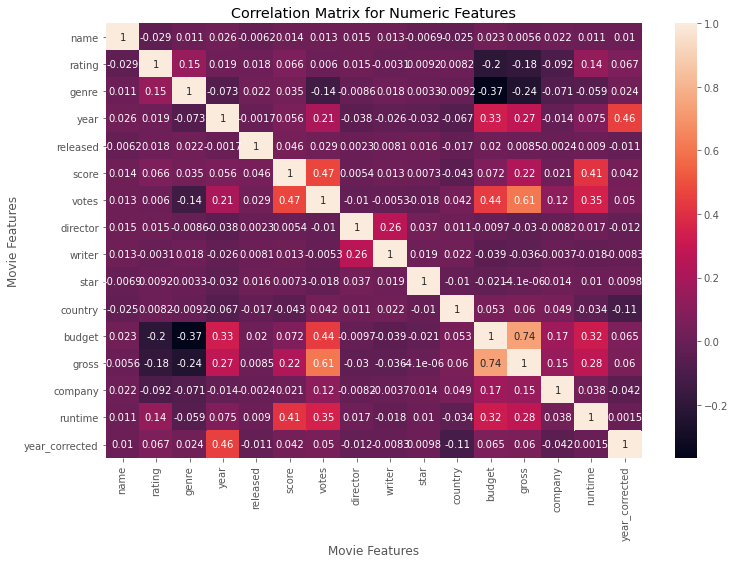

In [20]:
# Plotting heat-map inclusive of all the variables in the data.

correlation_matrix = df_numerized.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [21]:
#Since the above heat_map contains a lot of variable, it could get quite difficult to interpret the matrix.
#This problem could be solved by unstacking the matrix 

correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

sorted_pairs = corr_pairs.sort_values()

In [22]:
high_correlation = sorted_pairs[(sorted_pairs) > 0.5]

high_correlation

gross           votes             0.614751
votes           gross             0.614751
gross           budget            0.740247
budget          gross             0.740247
name            name              1.000000
company         company           1.000000
gross           gross             1.000000
budget          budget            1.000000
country         country           1.000000
star            star              1.000000
writer          writer            1.000000
director        director          1.000000
votes           votes             1.000000
score           score             1.000000
released        released          1.000000
year            year              1.000000
genre           genre             1.000000
rating          rating            1.000000
runtime         runtime           1.000000
year_corrected  year_corrected    1.000000
dtype: float64

# Conclusion

In [23]:
#We observe from the above results that Budget and Votes are highly correlated to gross revenue.
#However, company is not significantly correlated to gross which is against our hypothesis.